In [70]:
import pandas as pd
df = pd.read_csv('/Users/ivangolovkin/VSCode/my_project/my_first_repo/notebooks/new_data.csv', index_col=0).drop(columns=['siRNA concentration']).rename(columns={'Efficacy_x':'Efficacy'}) #duplicate
df.head()


,Efficacy,Experiment used to check activity,Target gene,Cell or Organism used,Transfection method,siRNA sense,siRNA antisense,Modification sense,Modification antisense,Position sense,Position antisense,Concentration new,id_,Duration after transfection new
0,EC-50 = 0.02 nM for target mRNA,Real-time quantitative PCR,SSB gene,Hepa1-6 cells,Lipofectamine RNAiMax,AAAUCAUGGUGAAAUAAAAUU,UUUUAUUUCACCAUGAUUUUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.02,5329,24
1,EC-50 = 0.6 nM for target mRNA,Real-time quantitative PCR,Luciferase gene,Hepa1-6 cells,Lipofectamine RNAiMax,AUAAGGCUAUGAAGAGAUATT,UAUCUCUUCAUAGCCUUAUTT,Inverted abasic* 2-Deoxy,5-phosphate ribose* 2-Deoxy,"1,21 * 20,21","1 * 20,21",0.60,5328,24
2,EC-50 = 0.14 nM for target mRNA,Real-time quantitative PCR,PHD3 gene,Hepa1-6 cells,Lipofectamine RNAiMax,CAGUCAGCAAAGACGUCUAUU,UAGACGUCUUUGCUGACUGUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.14,5327,24
3,EC-50 = 0.05 nM for target mRNA,Real-time quantitative PCR,PHD2 gene,Hepa1-6 cells,Lipofectamine RNAiMax,CAUUGAACCCAAAUUUGAUUU,AUCAAAUUUGGGUUCAAUGUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.05,5326,24
4,EC-50 = 0.51 nM for target mRNA,Real-time quantitative PCR,ApoB gene,Hepa1-6 cells,Lipofectamine RNAiMax,CAAGUGUCAUCACACUGAAUU,UUCAGUGUGAUGACACUUGUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.51,5325,24


## Обработка столбцов значений столбцов

In [71]:
#Нужно обработать колонку с эффективностью. Большинство случаев содержат в себе (value percent) или EC-50/IC-50 - эквивалентно 50

In [72]:
import re
def extract_value(text):
    """
    Извлекает значение из текста по правилам:
    - Для EC-50 или IC-50 оставляет "50"
    - Для процентов извлекает цифру перед словом percent
    """
    if pd.isna(text) or text is None:
        return None
    
    text = str(text).strip()
    
    # Случай 1: EC-50 или IC-50
    ec_ic_pattern = r'\b(EC|IC)-50\b'
    if re.search(ec_ic_pattern, text, re.IGNORECASE):
        return "50"
    
    # Случай 2: Проценты (цифра перед словом percent)
    percent_pattern = r'(\d+(?:\.\d+)?)\s*percent'
    percent_match = re.search(percent_pattern, text, re.IGNORECASE)
    if percent_match:
        return percent_match.group(1)
    
    return None

df['Efficacy_correct'] = df['Efficacy'].apply(extract_value).drop(columns=['Efficacy'])
df.shape


(4514, 15)

In [73]:
df.isna().sum()

Efficacy                              0
Experiment used to check activity     0
Target gene                           0
Cell or Organism used                 0
Transfection method                   0
siRNA sense                           0
siRNA antisense                       0
Modification sense                    0
Modification antisense                0
Position sense                        0
Position antisense                    0
Concentration new                     0
id_                                   0
Duration after transfection new       0
Efficacy_correct                     72
dtype: int64

In [74]:
#Датасет не содержит нанов - нет необходимости заниматьс заполнением пропущенных значений. Необходим анализ выбросов и аномалий

#Нужно проверить эффективность и другие численные столбцы на то, все ли случаи были обработаны корректно и не осталось ли там строковых значений

In [75]:
def remove_non_numeric_multiple(df, columns):
    """
    Удаляет строки, где любой из указанных столбцов содержит нечисловые значения
    
    Parameters:
    df - исходный DataFrame
    columns - список столбцов для проверки
    """
    df_clean = df.copy()
    
    for column in columns:
        # Преобразуем в числовой формат
        numeric_series = pd.to_numeric(df_clean[column], errors='coerce')
        # Оставляем только числовые значения
        df_clean = df_clean[numeric_series.notna()]
        # Преобразуем столбец к числовому типу
        df_clean[column] = pd.to_numeric(df_clean[column])
    
    return df_clean

columns = ['Efficacy_correct', 'Concentration new', 'id_', 'Duration after transfection new']

In [76]:
df_clean= remove_non_numeric_multiple(df, columns)
print("\nОчищенный DataFrame:")
df_clean


Очищенный DataFrame:


,Efficacy,Experiment used to check activity,Target gene,Cell or Organism used,Transfection method,siRNA sense,siRNA antisense,Modification sense,Modification antisense,Position sense,Position antisense,Concentration new,id_,Duration after transfection new,Efficacy_correct
0,EC-50 = 0.02 nM for target mRNA,Real-time quantitative PCR,SSB gene,Hepa1-6 cells,Lipofectamine RNAiMax,AAAUCAUGGUGAAAUAAAAUU,UUUUAUUUCACCAUGAUUUUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.02,5329,24,50.0
1,EC-50 = 0.6 nM for target mRNA,Real-time quantitative PCR,Luciferase gene,Hepa1-6 cells,Lipofectamine RNAiMax,AUAAGGCUAUGAAGAGAUATT,UAUCUCUUCAUAGCCUUAUTT,Inverted abasic* 2-Deoxy,5-phosphate ribose* 2-Deoxy,"1,21 * 20,21","1 * 20,21",0.60,5328,24,50.0
2,EC-50 = 0.14 nM for target mRNA,Real-time quantitative PCR,PHD3 gene,Hepa1-6 cells,Lipofectamine RNAiMax,CAGUCAGCAAAGACGUCUAUU,UAGACGUCUUUGCUGACUGUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.14,5327,24,50.0
3,EC-50 = 0.05 nM for target mRNA,Real-time quantitative PCR,PHD2 gene,Hepa1-6 cells,Lipofectamine RNAiMax,CAUUGAACCCAAAUUUGAUUU,AUCAAAUUUGGGUUCAAUGUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.05,5326,24,50.0
4,EC-50 = 0.51 nM for target mRNA,Real-time quantitative PCR,ApoB gene,Hepa1-6 cells,Lipofectamine RNAiMax,CAAGUGUCAUCACACUGAAUU,UUCAGUGUGAUGACACUUGUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.51,5325,24,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,81.4 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,Altritol nucleic acid* 2-Deoxy,2-O-Methyl,"1,2 * 22",2,10.00,5,72,81.4
4890,35.4 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,Hexitol nucleic acid,2-O-Methyl,"5,8,14,17,22",2,10.00,4,72,35.4
4891,54.2 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,Hexitol nucleic acid,2-O-Methyl,"2,8,14,17",2,10.00,3,72,54.2
4892,76.8 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,2-Guanidinoethyl,2-O-Methyl,18,2,10.00,2,72,76.8


In [77]:
df_clean.shape

(4442, 15)

In [78]:
#Избавились от нескольких десятков невалидных строчек, которые можно поправить лишь отсмотрев вручную

In [79]:
#Вывод: численные столбцы не имеют значений, записанных текстом. Целевая переменная обработана. Пропущенных значений в наборе данных нет.

## Анализ численных параметров (аномалии, выбросы, распределения)

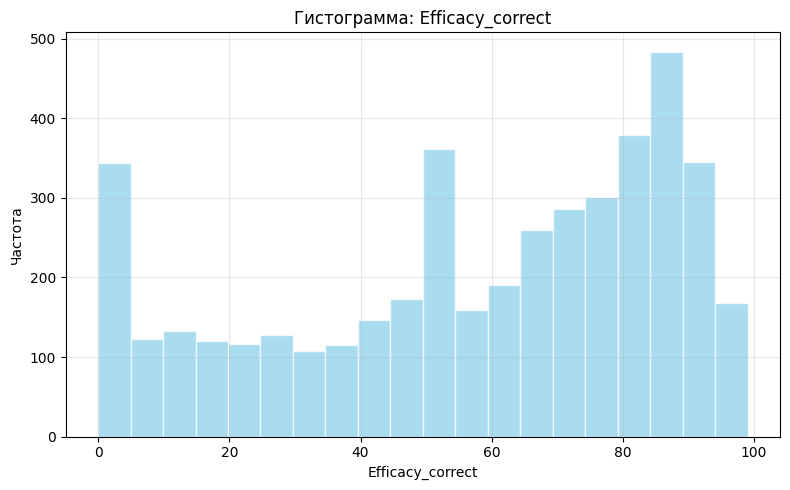

Статистика для 'Efficacy_correct':
  Количество значений: 4442
  Среднее: 57.14
  Медиана: 64.40
  Стандартное отклонение: 29.38


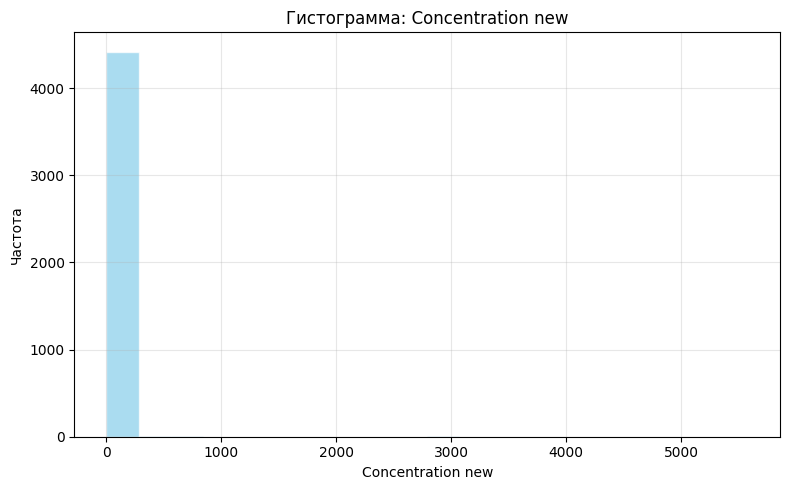

Статистика для 'Concentration new':
  Количество значений: 4442
  Среднее: 22.51
  Медиана: 10.00
  Стандартное отклонение: 131.31


In [80]:
import numpy as np
import matplotlib.pyplot as plt

def plot_numeric_histogram(df, numeric_column):
    """
    Строит гистограмму для числовой переменной 
    """
    
    light_blue ='#87CEEB'  # Светло-голубой цвет
    numeric_data = df[numeric_column].dropna()
    
    plt.figure(figsize=(8, 5))
    plt.hist(numeric_data, bins=20, color=light_blue, alpha=0.7, edgecolor='white')
    plt.title(f'Гистограмма: {numeric_column}')
    plt.xlabel(numeric_column)
    plt.ylabel('Частота')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Простая статистика
    print(f"Статистика для '{numeric_column}':")
    print(f"  Количество значений: {len(numeric_data)}")
    print(f"  Среднее: {numeric_data.mean():.2f}")
    print(f"  Медиана: {numeric_data.median():.2f}")
    print(f"  Стандартное отклонение: {numeric_data.std():.2f}")

plot_numeric_histogram(df_clean, 'Efficacy_correct')
plot_numeric_histogram(df_clean, 'Concentration new')


In [81]:
#Отрцательных значений и значений больше 100 не наблюдается - все в рамках разумного. Эффективность снималась эксперементально, не вижу смысла брать 5-95 по квантилям
#В концентрации очевдиные выбросы - будем брать 0-95 по квантилю

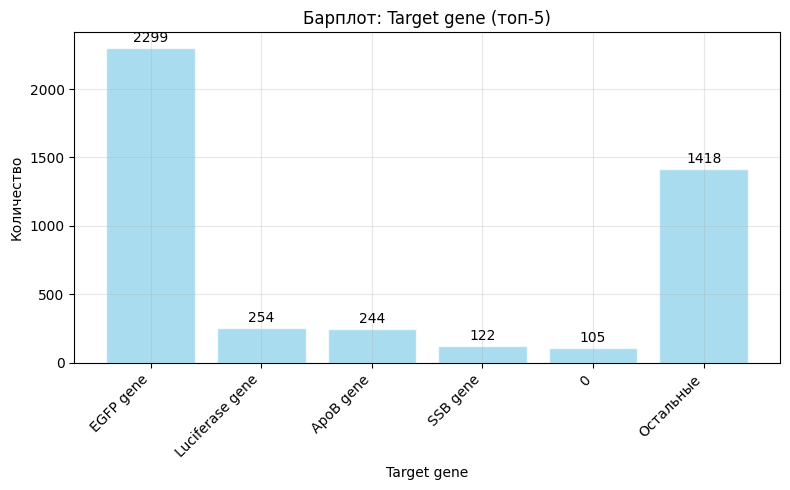

Статистика для 'Target gene':
  Всего значений: 4442
  Уникальных категорий: 59
  Показано категорий: 6
  EGFP gene: 2299 (51.8%)
  Luciferase gene: 254 (5.7%)
  ApoB gene: 244 (5.5%)
  SSB gene: 122 (2.7%)
  0: 105 (2.4%)
  Остальные (54 кат.): 1418 (31.9%)


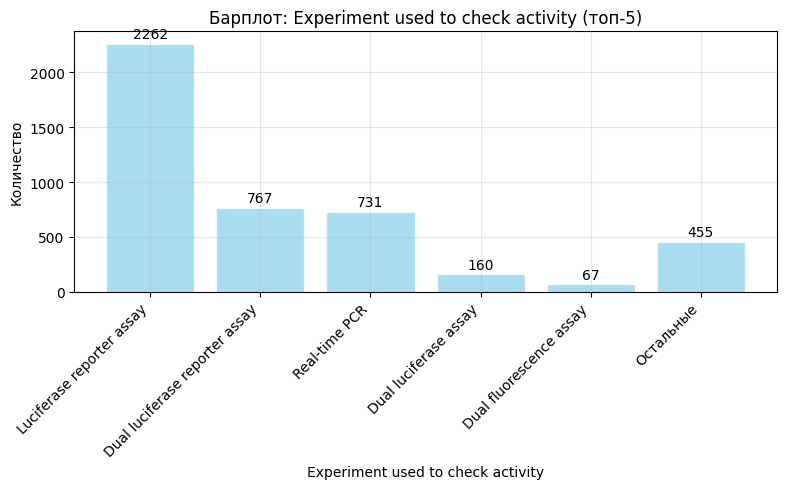

Статистика для 'Experiment used to check activity':
  Всего значений: 4442
  Уникальных категорий: 30
  Показано категорий: 6
  Luciferase reporter assay: 2262 (50.9%)
  Dual luciferase reporter assay: 767 (17.3%)
  Real-time PCR: 731 (16.5%)
  Dual luciferase assay: 160 (3.6%)
  Dual fluorescence assay: 67 (1.5%)
  Остальные (25 кат.): 455 (10.2%)


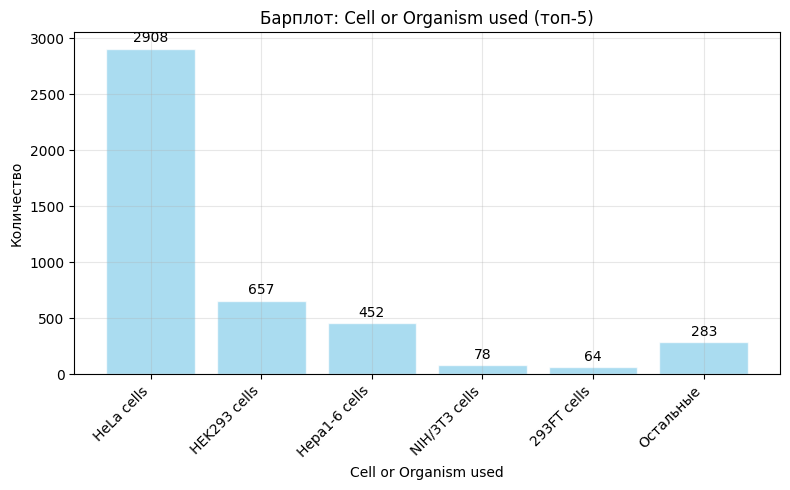

Статистика для 'Cell or Organism used':
  Всего значений: 4442
  Уникальных категорий: 29
  Показано категорий: 6
  HeLa cells: 2908 (65.5%)
  HEK293 cells: 657 (14.8%)
  Hepa1-6 cells: 452 (10.2%)
  NIH/3T3 cells: 78 (1.8%)
  293FT cells: 64 (1.4%)
  Остальные (24 кат.): 283 (6.4%)


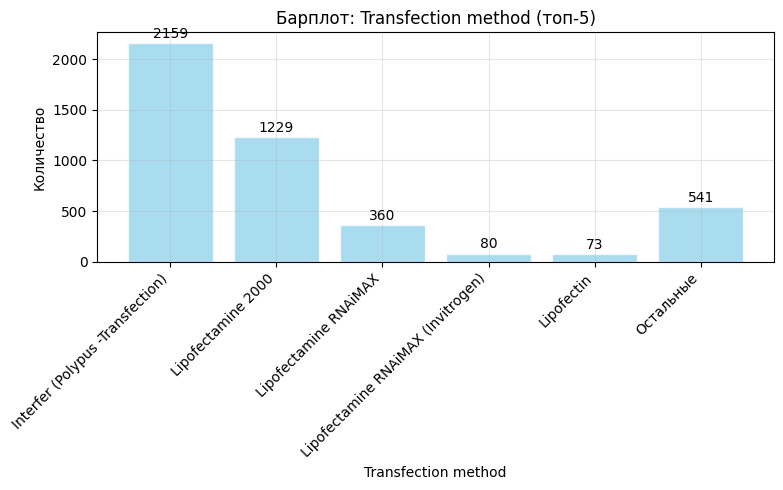

Статистика для 'Transfection method':
  Всего значений: 4442
  Уникальных категорий: 32
  Показано категорий: 6
  Interfer (Polypus -Transfection): 2159 (48.6%)
  Lipofectamine 2000: 1229 (27.7%)
  Lipofectamine RNAiMAX: 360 (8.1%)
  Lipofectamine RNAiMAX (Invitrogen): 80 (1.8%)
  Lipofectin: 73 (1.6%)
  Остальные (27 кат.): 541 (12.2%)


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_categorical_barchart(df, categorical_column, top_n=5):
    """
    Строит простой барплот для категориальной переменной с топ-N категориями
    Остальные категории объединяются в 'Остальные'
    """
    
    light_blue = '#87CEEB'  # Светло-голубой цвет
    
    # Получаем все значения и их частоты
    value_counts = df[categorical_column].value_counts()
    total_categories = len(value_counts)
    
    # Если категорий больше чем top_n, объединяем остальные
    if total_categories > top_n:
        top_categories = value_counts.head(top_n)
        others_count = value_counts[top_n:].sum()
        
        # Создаем новый Series с топ-N и "Остальные"
        plot_data = top_categories.copy()
        plot_data['Остальные'] = others_count
    else:
        plot_data = value_counts
    
    plt.figure(figsize=(8, 5))
    bars = plt.bar(plot_data.index.astype(str), plot_data.values, 
                   color=light_blue, alpha=0.7, edgecolor='white')
    plt.title(f'Барплот: {categorical_column} (топ-{min(top_n, total_categories)})')
    plt.xlabel(categorical_column)
    plt.ylabel('Количество')
    plt.grid(True, alpha=0.3)
    
    # Добавляем значения на столбцы
    for bar, count in zip(bars, plot_data.values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01 * max(plot_data.values),
                f'{count}', ha='center', va='bottom')
    
    # Поворачиваем подписи если они длинные
    if max(len(str(x)) for x in plot_data.index) > 5:
        plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    # Статистика по категориям
    total = len(df[categorical_column].dropna())
    print(f"Статистика для '{categorical_column}':")
    print(f"  Всего значений: {total}")
    print(f"  Уникальных категорий: {total_categories}")
    print(f"  Показано категорий: {len(plot_data)}")
    
    for i, (category, count) in enumerate(plot_data.items()):
        percentage = (count / total) * 100
        if category == 'Остальные':
            remaining_categories = total_categories - top_n
            print(f"  {category} ({remaining_categories} кат.): {count} ({percentage:.1f}%)")
        else:
            print(f"  {category}: {count} ({percentage:.1f}%)")


plot_categorical_barchart(df_clean, 'Target gene', top_n=5)
plot_categorical_barchart(df_clean, 'Experiment used to check activity', top_n=5)
plot_categorical_barchart(df_clean, 'Cell or Organism used', top_n=5)
plot_categorical_barchart(df_clean, 'Transfection method', top_n=5)



In [83]:
#В каждом столбце много одинаковых значений, записанных по-разному. Вероятно, бд собирали разные люди. В идеале необходима унификация

In [84]:
#Вывод: в категориальных переменных необходима унификация, в столбце концентрации необходимо удалить выбросы больше 95 квантиля

## Фичеинжиниринг и корреляции

In [85]:
#Посчитаем длину сиквенсов

In [86]:
def add_string_length_column(df, column_name, new_column_name=None):
    """
    Добавляет столбец с длиной строки для указанного столбца
    """
    if new_column_name is None:
        new_column_name = f'{column_name}_length'
    
    # Создаем новый столбец с длиной строки
    df[new_column_name] = df[column_name].astype(str).str.len()
    
    return df

add_string_length_column(df_clean, 'siRNA sense')
add_string_length_column(df_clean, 'siRNA antisense')

,Efficacy,Experiment used to check activity,Target gene,Cell or Organism used,Transfection method,siRNA sense,siRNA antisense,Modification sense,Modification antisense,Position sense,Position antisense,Concentration new,id_,Duration after transfection new,Efficacy_correct,siRNA sense_length,siRNA antisense_length
0,EC-50 = 0.02 nM for target mRNA,Real-time quantitative PCR,SSB gene,Hepa1-6 cells,Lipofectamine RNAiMax,AAAUCAUGGUGAAAUAAAAUU,UUUUAUUUCACCAUGAUUUUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.02,5329,24,50.0,21,21
1,EC-50 = 0.6 nM for target mRNA,Real-time quantitative PCR,Luciferase gene,Hepa1-6 cells,Lipofectamine RNAiMax,AUAAGGCUAUGAAGAGAUATT,UAUCUCUUCAUAGCCUUAUTT,Inverted abasic* 2-Deoxy,5-phosphate ribose* 2-Deoxy,"1,21 * 20,21","1 * 20,21",0.60,5328,24,50.0,21,21
2,EC-50 = 0.14 nM for target mRNA,Real-time quantitative PCR,PHD3 gene,Hepa1-6 cells,Lipofectamine RNAiMax,CAGUCAGCAAAGACGUCUAUU,UAGACGUCUUUGCUGACUGUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.14,5327,24,50.0,21,21
3,EC-50 = 0.05 nM for target mRNA,Real-time quantitative PCR,PHD2 gene,Hepa1-6 cells,Lipofectamine RNAiMax,CAUUGAACCCAAAUUUGAUUU,AUCAAAUUUGGGUUCAAUGUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.05,5326,24,50.0,21,21
4,EC-50 = 0.51 nM for target mRNA,Real-time quantitative PCR,ApoB gene,Hepa1-6 cells,Lipofectamine RNAiMax,CAAGUGUCAUCACACUGAAUU,UUCAGUGUGAUGACACUUGUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.51,5325,24,50.0,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,81.4 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,Altritol nucleic acid* 2-Deoxy,2-O-Methyl,"1,2 * 22",2,10.00,5,72,81.4,22,21
4890,35.4 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,Hexitol nucleic acid,2-O-Methyl,"5,8,14,17,22",2,10.00,4,72,35.4,22,21
4891,54.2 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,Hexitol nucleic acid,2-O-Methyl,"2,8,14,17",2,10.00,3,72,54.2,21,21
4892,76.8 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,2-Guanidinoethyl,2-O-Methyl,18,2,10.00,2,72,76.8,21,21


In [87]:
#Проанализируем распределение

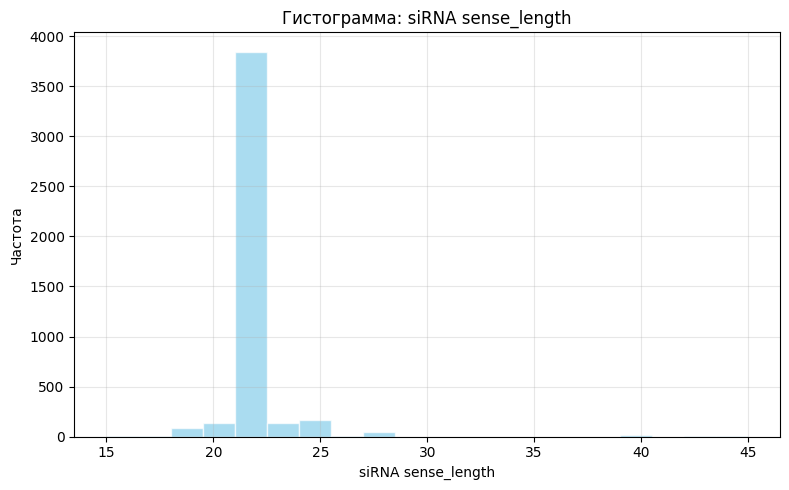

Статистика для 'siRNA sense_length':
  Количество значений: 4442
  Среднее: 21.54
  Медиана: 21.00
  Стандартное отклонение: 1.72


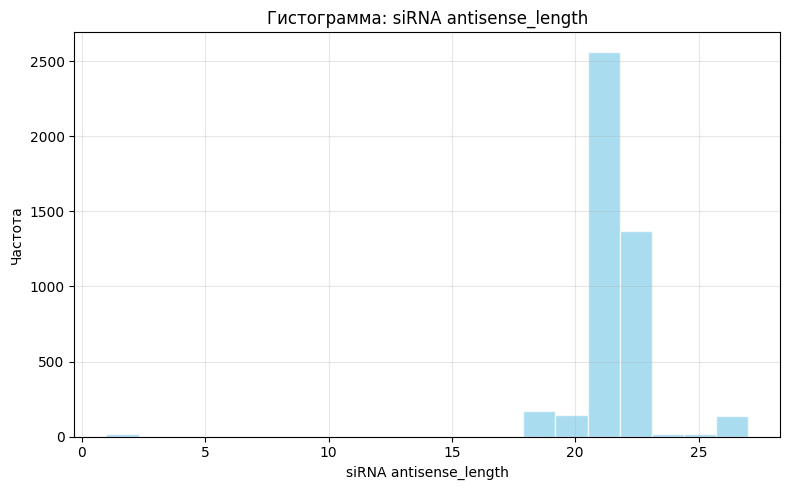

Статистика для 'siRNA antisense_length':
  Количество значений: 4442
  Среднее: 21.31
  Медиана: 21.00
  Стандартное отклонение: 1.89


In [88]:
plot_numeric_histogram(df_clean, 'siRNA sense_length')
plot_numeric_histogram(df_clean, 'siRNA antisense_length')


In [89]:
#Диапазон длин соответствует нормальному для siRNA. Как правило их цепи находятся в диапазоне длин 20-25 нуклеотидов

In [94]:
df_clean[['Efficacy_correct', 'Concentration new', 'siRNA sense_length', 'siRNA antisense_length']].corr()

,Efficacy_correct,Concentration new,siRNA sense_length,siRNA antisense_length
Efficacy_correct,1.000000,0.018264,-0.024049,0.005367
Concentration new,0.018264,1.000000,-0.037295,-0.043938
siRNA sense_length,-0.024049,-0.037295,1.000000,-0.208545
siRNA antisense_length,0.005367,-0.043938,-0.208545,1.000000


In [ ]:
#Непрерывные величины не имеют между собой корреляций

## Дальнейшая работа

In [ ]:
#Подразумевается расчет GC состава сиквенсов, анализ модификаций и их количества, оценка влияния количества модификаций на эффективность, исключение выбросов в столбце эффективности и унификация значений категориальных переменных.
#  Столбцы подготовлены к дальнейшей работе, пропусков нет, нанов нет